In [75]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab
from scipy.signal import lfilter
from scipy.signal import periodogram
from scipy.signal import TransferFunction
from scipy.signal import ZerosPolesGain
from scipy.signal import sawtooth
from scipy.signal import freqz
from scipy.fftpack import *
from control.matlab import *

# 4.2.1
Разработайте в Matlab функцию \[P, P_dB] = calc_power(x) для вычисления мощности сигнала по формуле 

$$P_a = \frac{1}{N}\displaystyle\sum_{n = 0}^{N - 1} x^2(n).$$

Функция также должна выдавать значение мощности в децибелах

$$P_{dB} = 10 \log_{10}P_a.$$
 
Посчитайте мощность следующих сигналов при n = 0, 1, ..., 127:

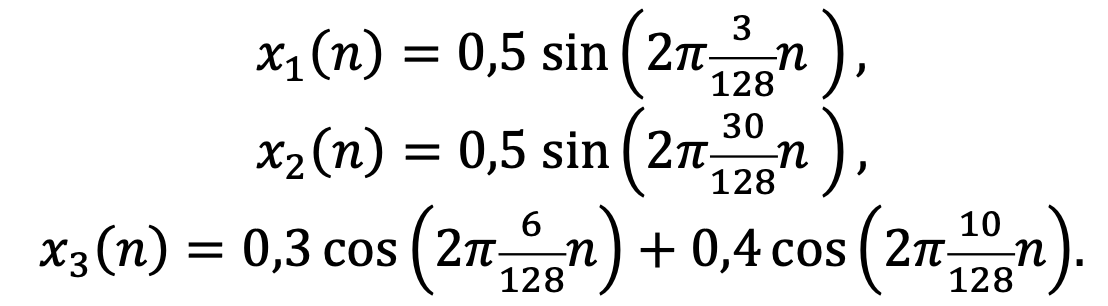

In [17]:
def calc_power(x):
    P = (sum(i * i for i in x) / len(x))
    P_dB = 10 * np.log10(P)
    return [P, P_dB]

In [19]:
n = np.arange(0, 128, 1)
x1 = 0.5 * np.sin(2 * np.pi * 3 / 128 * n)
x2 = 0.5 * np.sin(2 * np.pi * 30 / 128 * n)
x3 = 0.3 * np.cos(2 * np.pi * 6 / 128 * n) + 0.4 * np.cos(2 * np.pi * 10 / 128 * n)

In [20]:
P1 = calc_power(x1)
P2 = calc_power(x2)
P3 = calc_power(x3)

In [23]:
print(f'Мощность для первого сигнала {P1}')
print(f'Мощность для второго сигнала {P2}')
print(f'Мощность для третьего сигнала {P3}')

Мощность для первого сигнала [0.125, -9.030899869919436]
Мощность для второго сигнала [0.1249999999999999, -9.03089986991944]
Мощность для третьего сигнала [0.12499999999999996, -9.030899869919438]


# 4.2.2
Разработайте в Matlab функцию для вычисление периодограммы сигнала 

$$P_{xx}(k) = \frac{1}{N} |X(k)|^2, k = 0, 1, ..., N - 1.$$ 

Постройте периодограммы сигналов из задания 4.2.1. Вычислите мощность сигналов из полученных периодограмм по формуле

$$P_a = \frac{1}{N^2}\displaystyle\sum_{k = 0}^{N - 1} |X(k)|^2.$$.

In [29]:
def calc_pxx(x):
    Pxx = [(np.fabs(i) ** 2) / len(x) for i in x]
    Pa = calc_power(Pxx)
    return [Pxx, Pa]

In [30]:
Pxx1 = calc_pxx(x1)
Pxx2 = calc_pxx(x2)
Pxx3 = calc_pxx(x3)

In [37]:
print(f'Мощность для первого сигнала {Pxx1[1]}')
print(f'Мощность для второго сигнала {Pxx2[1]}')
print(f'Мощность для третьего сигнала {Pxx3[1]}')

Мощность для первого сигнала [1.4305114746093748e-06, -58.44508654223943]
Мощность для второго сигнала [1.4305114746093752e-06, -58.44508654223943]
Мощность для третьего сигнала [2.089691162109375e-06, -56.799178940337185]


In [56]:
def plorPxx(i):
    global Pxx1, Pxx2, Pxx3
    Pxx = [Pxx1, Pxx2, Pxx3]
    pylab.subplot(3, 1, (i + 1))
    pylab.plot(n, Pxx[i][0], linestyle='-', color='b', linewidth=0.5)
    pylab.grid()
    pylab.xlabel('Номер отсчета')
    pylab.ylabel('Амплитуда')
    pylab.title(f'Сигнал № {(i + 1)}')

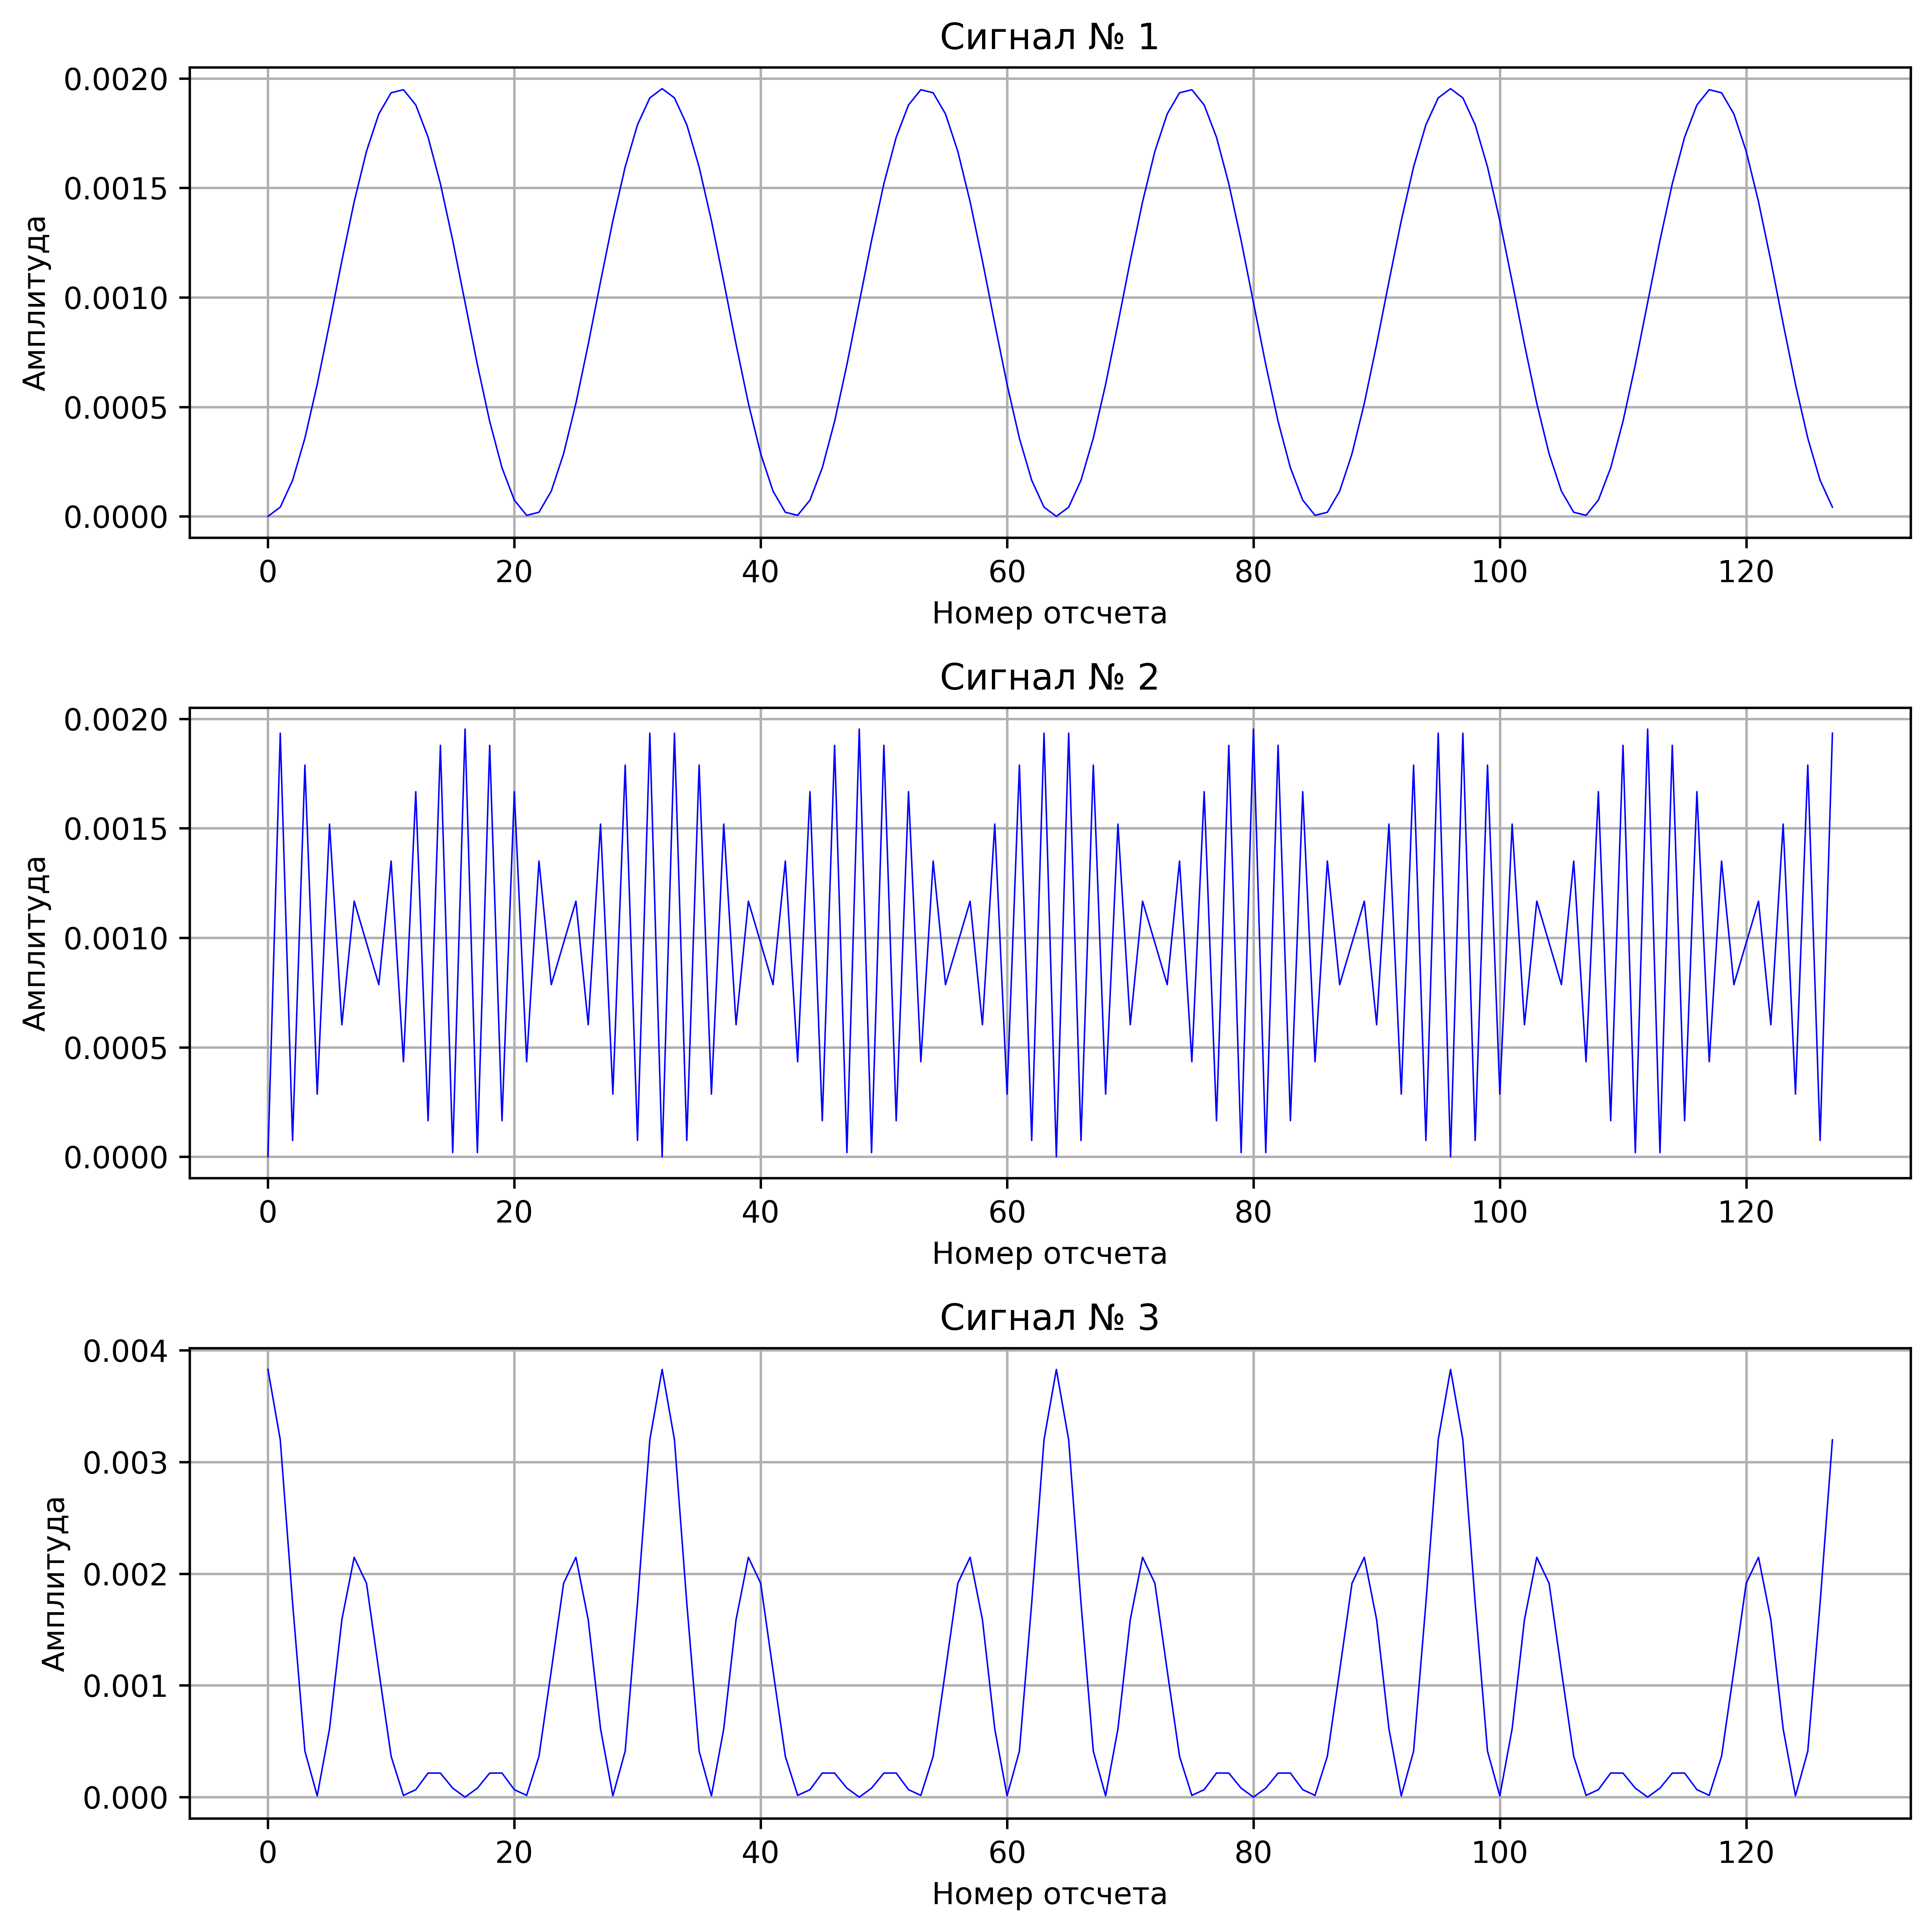

In [57]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

plorPxx(0)
plorPxx(1)
plorPxx(2)

pylab.tight_layout()
pylab.savefig('4_2_2_signal.png', dpi=600)
pylab.show()

# 4.2.3
Предположим, что зарегистрированный сигнал представляет собой сумму полезного сигнала и белого шума (n = 0, 1, ..., 511):

$$x(n) = 0.4 \cos(2 \pi \frac{9}{128} n) + A \cdot r(n).$$

Определите максимальное отношение сигнал/шум (ОСШ), при котором по периодограмме x(n) можно обнаружить в нем наличие полезного сигнала.
Отношение сигнал/шум (англ. signal-to-noise ratio, SNR) – безразмерная величина, равная отношению мощности полезного сигнала к мощности шума:

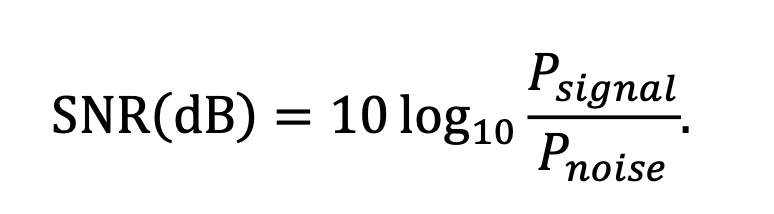

Для определения требуемого ОСШ необходимо выполнить несколько экспериментов, плавно изменяя параметр 𝐴 и наблюдая изменение периодограммы сигнала. Будем считать, что сигнал можно обнаружить, если уровень полезного сигнала на 10 дБ больше уровня компонент спектра, образуемых шумовым сигналом. Белый шум 𝑟(𝑛)можно получить в Matlabпри помощи функции.

In [64]:
def calc_Ps(x):
    Ps = []
    for i in x:
        Ps.append(calc_power(i)[0])
    return Ps

In [74]:
n = np.arange(0, 512, 1)
A = [0.01, 0.05, 0.1, 0.25, 0.3, 0.4, 0.5, 1, 5, 10, 50, 100, 1000]
rng = np.random.default_rng()
r = rng.integers(low=-1, high=1, size=512)
x = 0.4 * np.cos(2 * np.pi * 9 / 128 * n)
Psignal = calc_power(x)[0]
Ar = []
for a in A:
    Ar.append(a * r)
Pnoise = calc_Ps(Ar)
SNR = 10 * np.log10(Psignal / Pnoise)
print(SNR)

[ 32.10959407  18.13019399  12.10959407   4.1507939    2.56716898
   0.06839425  -1.86980601  -7.89040593 -21.86980601 -27.89040593
 -41.86980601 -47.89040593 -67.89040593]


# 4.2.4
Оцените СПМ сигнала на выходе фильтра при помощи метода
усреднения периодограмм. Параметры 𝑁𝑆𝐴𝑀𝑃 и 𝑁𝑆𝐻𝐼𝐹𝑇 подберите самостоя-
тельно. На вход фильтра поступает 4096 отсчетов белого шума. Коэффициенты
фильтра

b = \[0.00482434 0 -0.0192973 0 0.02894606 0 -0.0192973 0 0.00482434];

a = \[1 -2.06958023 3.99771255 -4.3894077 4.45285533 -2.9060422 1.75168470 - 0.5862147 0.18737949];

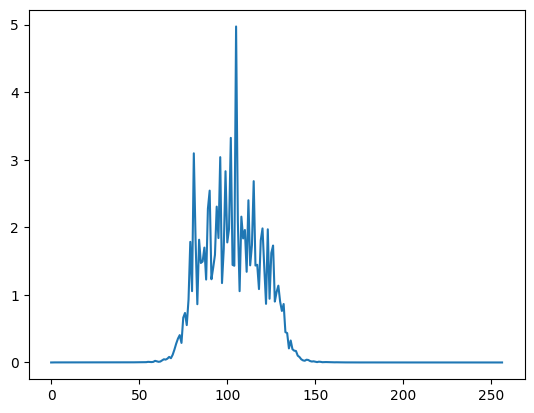

In [85]:
x = np.random.randn(4096)

# Коэффициенты фильтра
b = np.array([0.00482434, 0, -0.0192973, 0, 0.02894606, 0, -0.0192973, 0, 0.00482434])
a = np.array([1, -2.06958023, 3.99771255, -4.3894077, 4.45285533, -2.9060422, 1.75168470, -0.5862147, 0.18737949])

# Параметры усреднения периодограмм
N_SAMP = 512
N_SHIF = 256

# Разделение входного сигнала на окна
x_windows = np.reshape(x, (8, N_SAMP))

# Применение фильтра к каждому окну
y_windows = np.zeros_like(x_windows)
for i, x_win in enumerate(x_windows):
    y_windows[i] = lfilter(b, a, x_win)

# Вычисление периодограммы для каждого окна
periodograms = np.zeros((y_windows.shape[0], N_SAMP // 2 + 1))
for i, y_win in enumerate(y_windows):
    _, periodograms[i] = periodogram(y_win)

# Усреднение периодограмм
mean_periodogram = np.mean(periodograms, axis=0)

# Оценка СПМ сигнала
spm_estimate = np.sqrt(mean_periodogram)

pylab.plot(mean_periodogram)

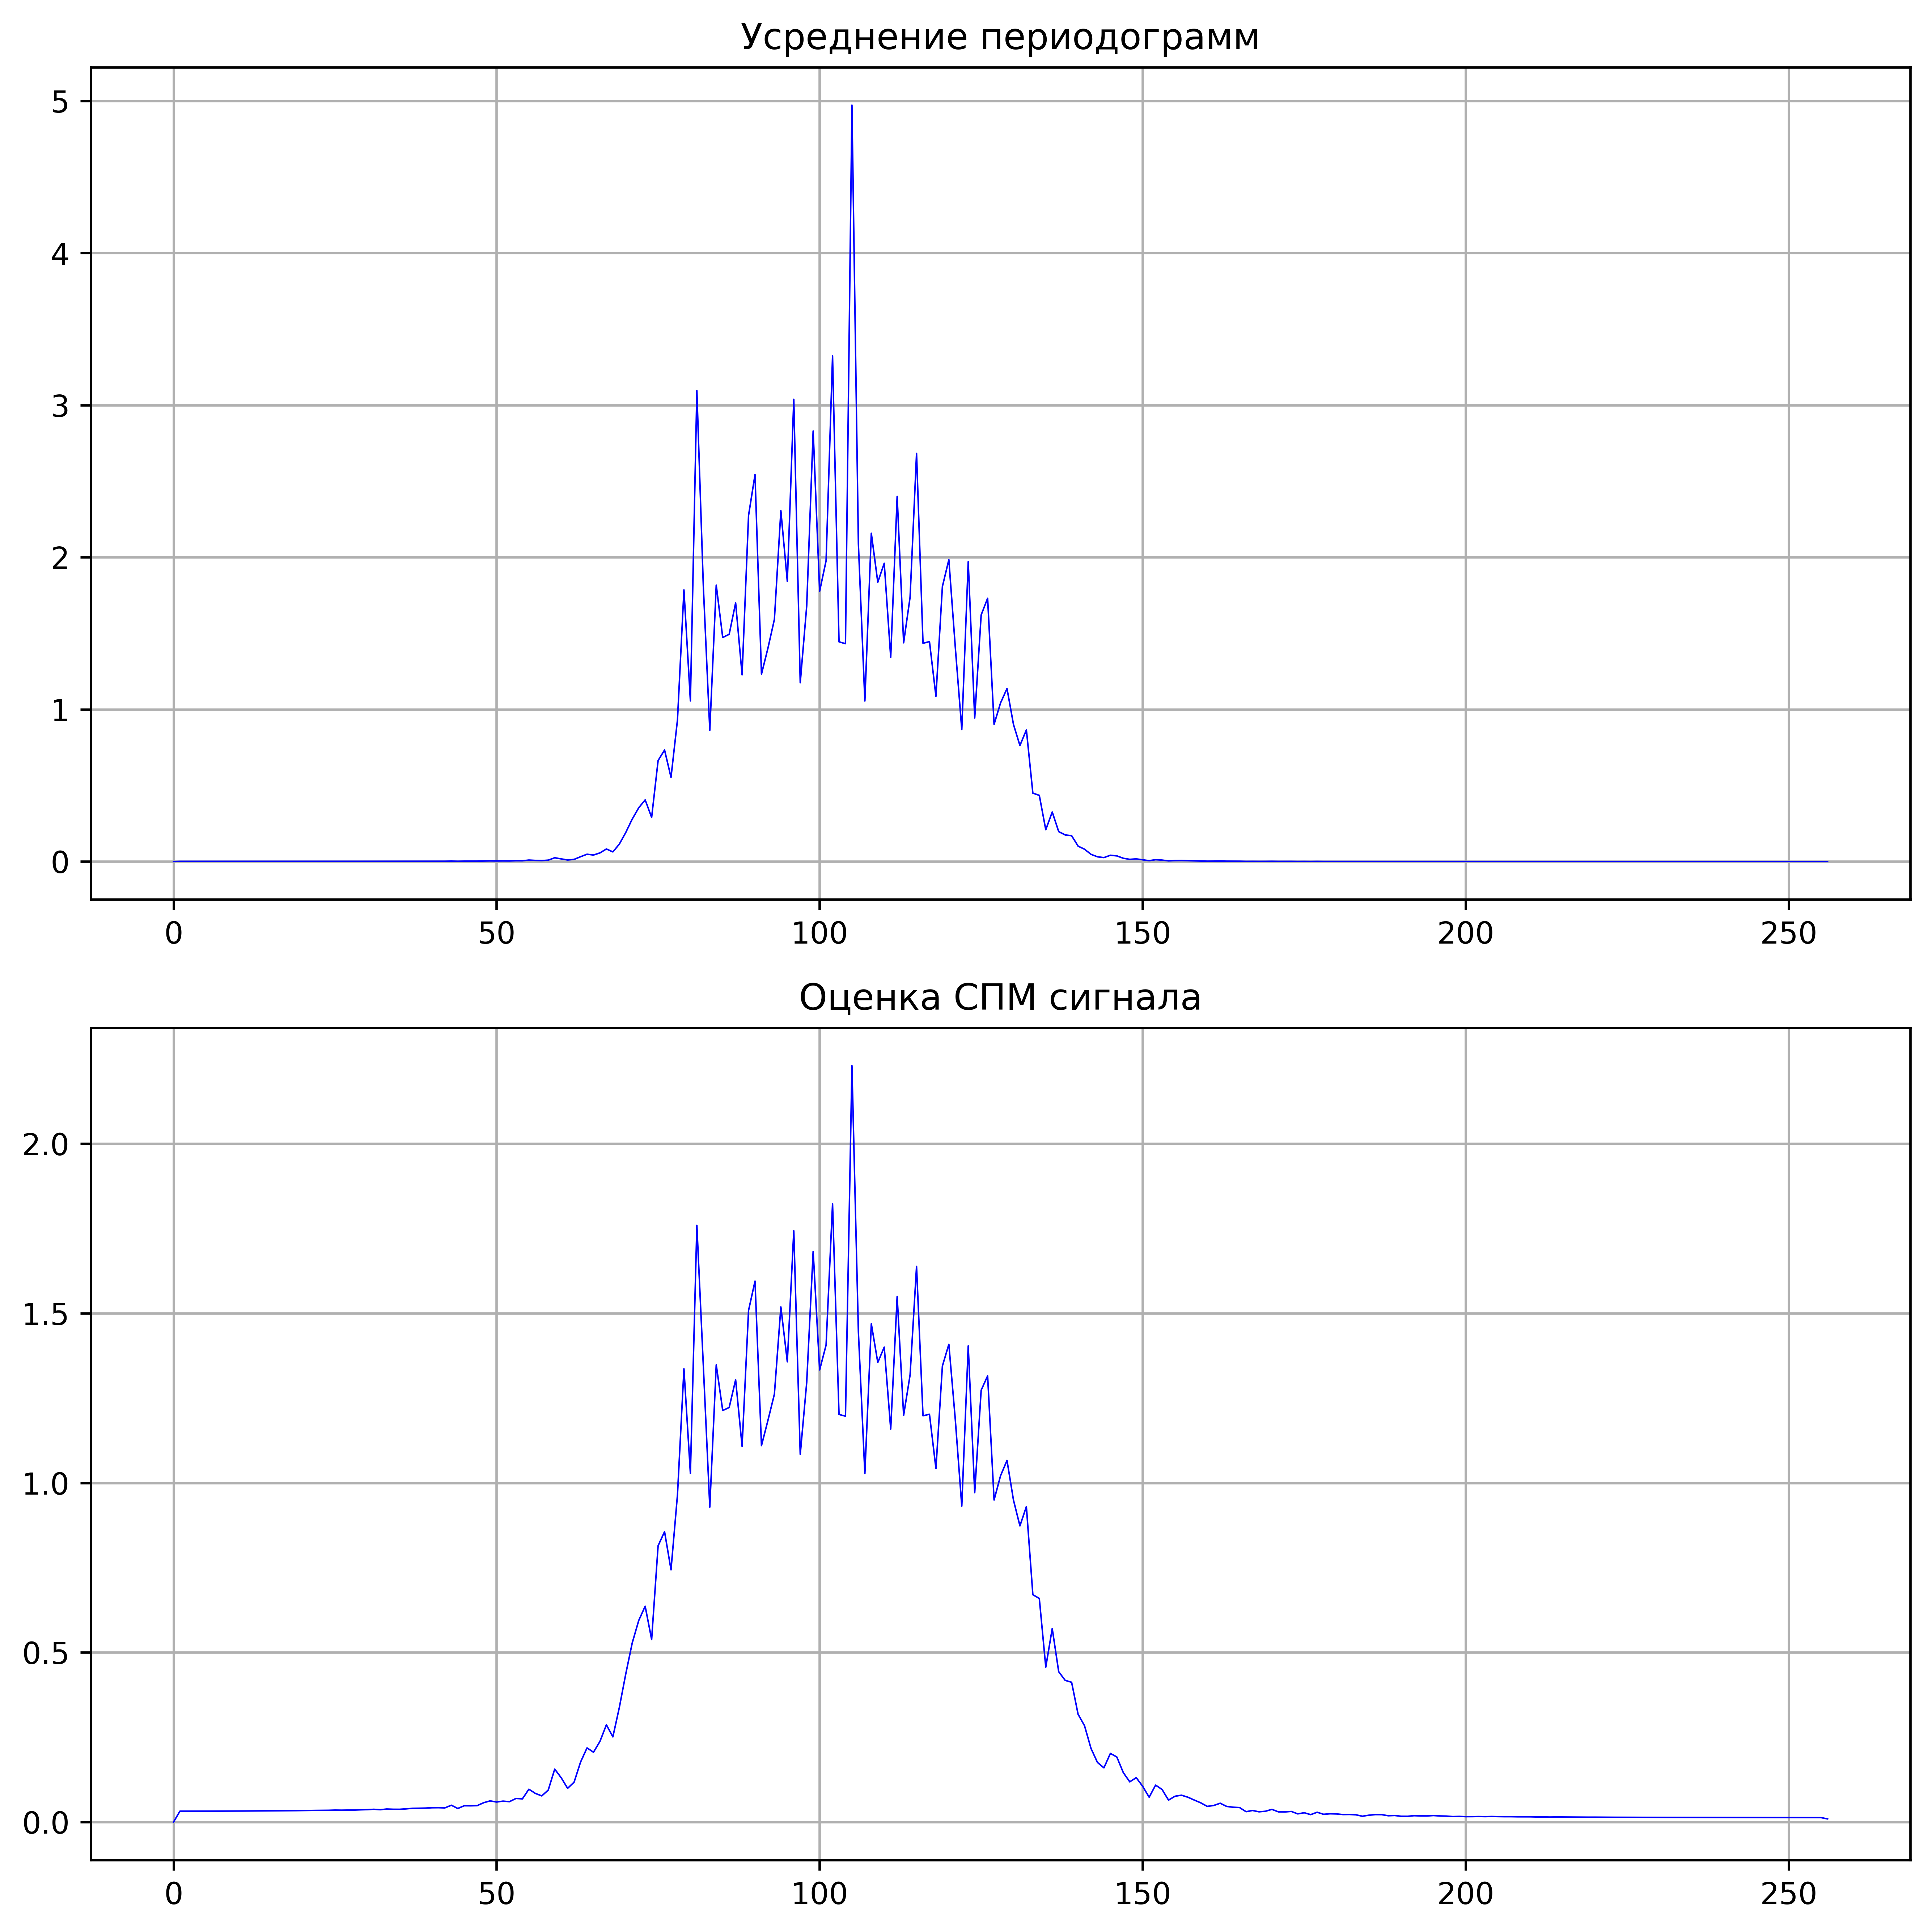

In [88]:
pylab.figure(figsize=(9.0, 9.0), dpi=600)

pylab.subplot(2, 1, 1)
pylab.plot(mean_periodogram, linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.title('Усреднение периодограмм')

pylab.subplot(2, 1, 2)
pylab.plot(spm_estimate, linestyle='-', color='b', linewidth=0.5)
pylab.grid()
pylab.title('Оценка СПМ сигнала')

pylab.tight_layout()
pylab.savefig('4_2_4_spm.png', dpi=600)
pylab.show()

# 4.2.5
Задание не смог выполнить, так как не нашел исходников.

# 4.2.6
Разработайте в Matlab функцию для отделения вокализованных участков речи от невокализованных:
\[x_v, x_u] = vu_separate(x, N, threshold)
Сепарация (разделение) происходит на основе анализа кратковременной
мощности сигнала(см.(4.7)). На вход функции поступает речевой сигнал x, дли-
на окна анализа на котором считается мощность N и значение порога
threshold. Если мощность сигнала в момент времени 𝑛 больше порога, то счи-
тается, что отсчет 𝑥(𝑛) является вокализованным, в противном случае – нево-
кализованным. Сепарация выполняется следующим образом:

a) для входного сигнала 𝑥(𝑛) рассчитывается кратковременная мощность
𝑃(𝑛) по выражению (4.7);

б) рассчитывается признак вокализованности:
𝑣(𝑛)={1, 𝑃(𝑛)>thershold,
0, 𝑃(𝑛)≤thershold;

в) вычисляется сепарация сигнала:
𝑥𝑣(𝑛)=𝑥(𝑛)⋅𝑣(𝑛),
𝑥𝑢(𝑛)=𝑥(𝑛)⋅(1−𝑣(𝑛)).

Удобно мощность сигнала посчитать в децибелах:
𝑃𝑑𝐵(𝑛)=10log10𝑃(𝑛)
и порог для сепарации также подбирать в децибелах.

In [90]:
def vu_separate(x, N, threshold):
    P = np.abs(x) ** 2
    P_dB = 10 * np.log10(P)
    v = P_dB > threshold    
    x_v = x * v
    x_u = x * (1 - v)
    return x_v, x_u